# Dimensionality Reduction
This notebook contains sample code for dimensionality reduction

Note that the data generated shouldn't be expected to fully align given the way it's randomly generated

In [2]:
%matplotlib notebook
import numpy as np
from sklearn.decomposition import PCA
import hypertools as hyp
import matplotlib.pyplot as plt

## Generate some data

In [3]:
# Make fake data (or load data)
mean = np.array([1.0, 2.0, 3.0, 1.0, 2.0, 3.0])
cov = np.array([[1.0, 0.1, 0.1, 0.9, 0.1, 0.1],
                [0.1, 1.0, 0.1, 0.1, 0.9, 0.1],
                [0.1, 0.1, 1.0, 0.1, 0.1, 0.9],
                [0.9, 0.1, 0.1, 1.0, 0.1, 0.1],
                [0.1, 0.9, 0.1, 0.1, 1.0, 0.1],
                [0.1, 0.1, 0.9, 0.1, 0.1, 1.0]
               ])
X = np.random.multivariate_normal(mean,cov,100)

## Code for one matrix of data (e.g. one subject)

In [49]:
# Perform PCA
pca = PCA(n_components=X.shape[1])
trans_X = pca.fit_transform(X)
var_ex = pca.explained_variance_ratio_

<IPython.core.display.Javascript object>


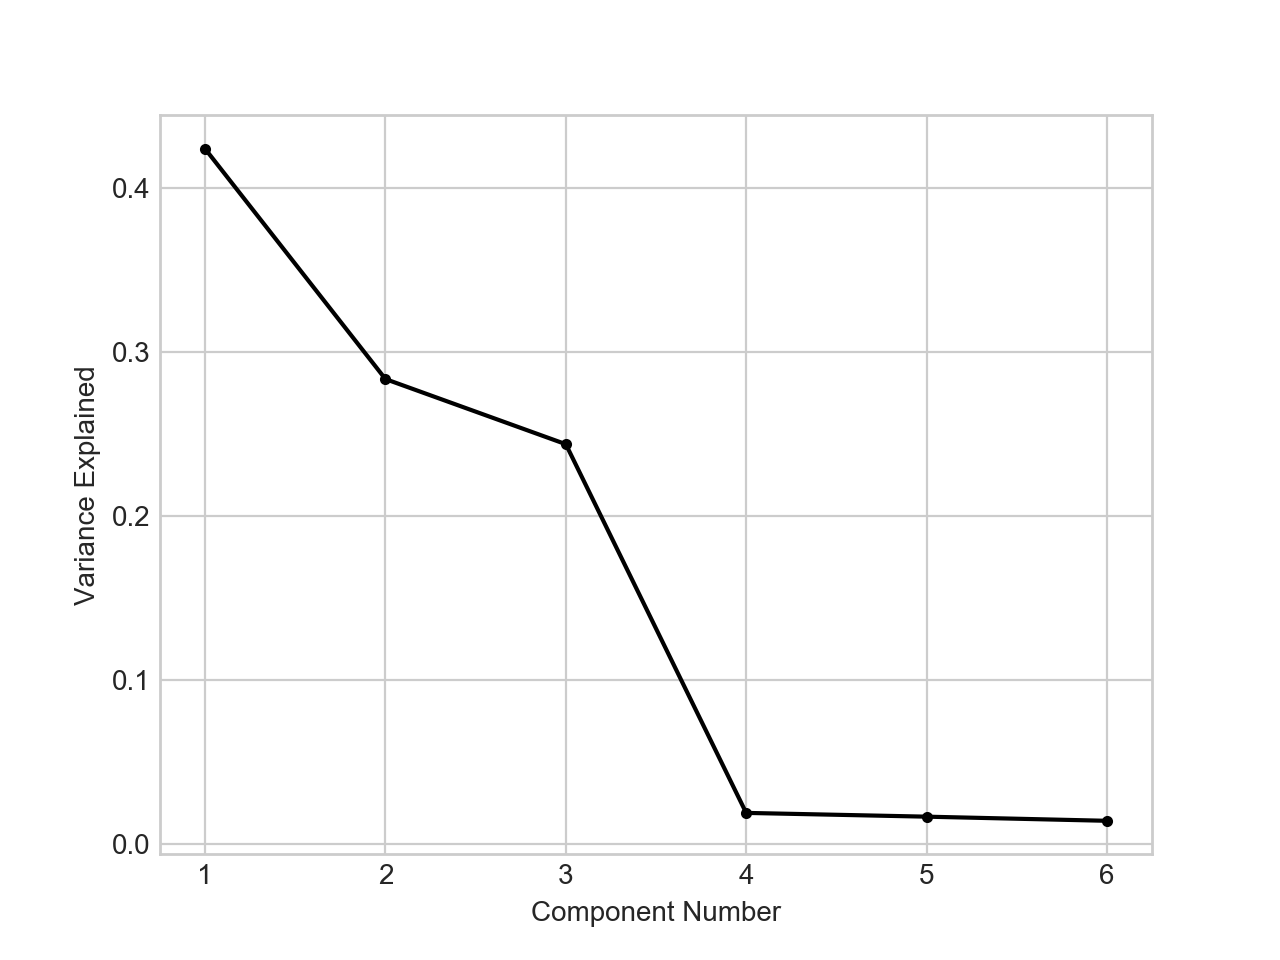

In [50]:
# Plot the variance explained by as a function of components
plt.plot(range(1,len(var_ex)+1), var_ex, 'k.-')
plt.ylabel('Variance Explained')
plt.xlabel('Component Number')
plt.show()

<IPython.core.display.Javascript object>


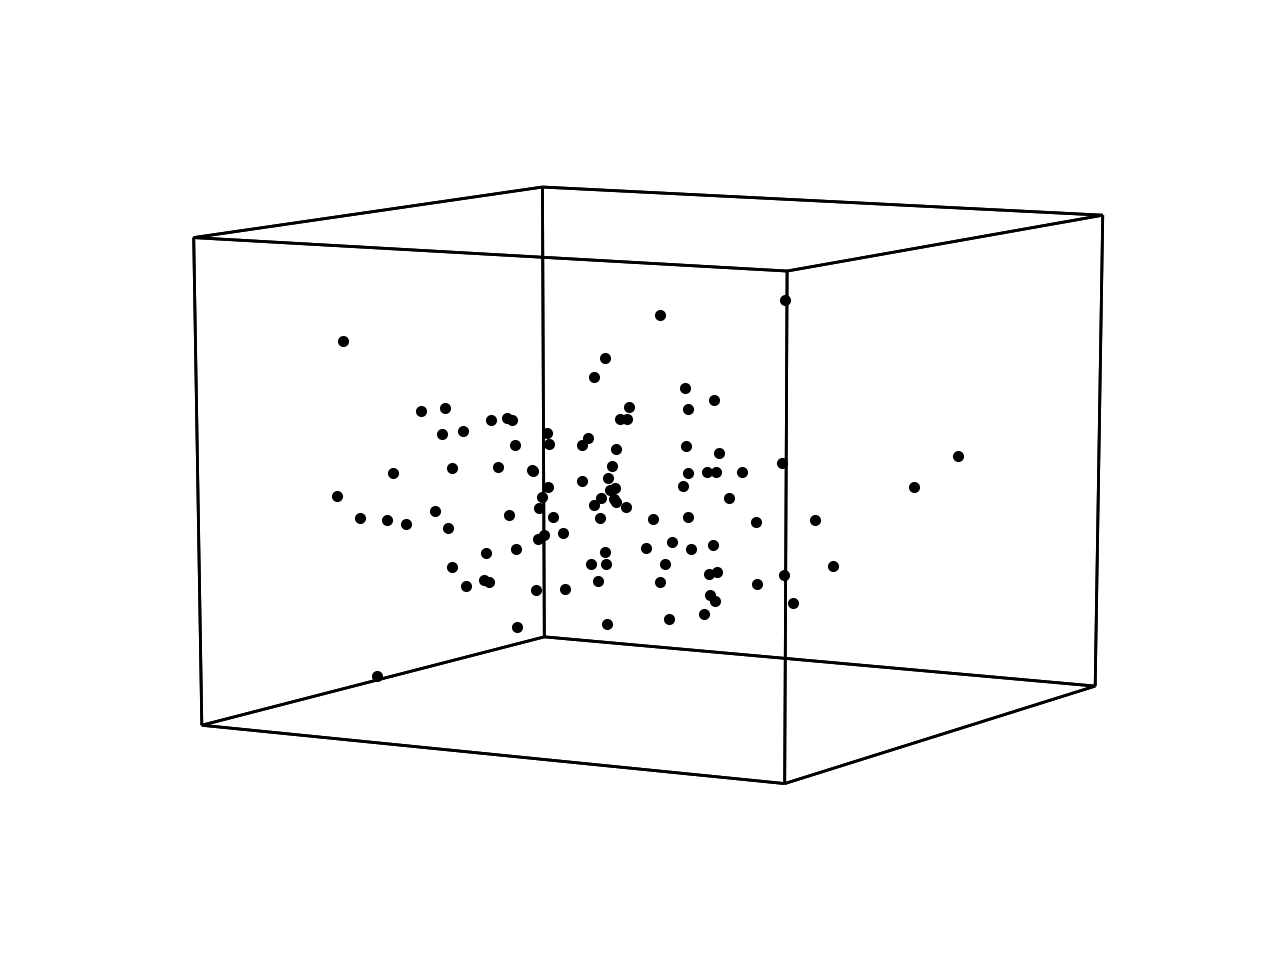

In [10]:
hyp.plot(trans_X[:, :3], 'k.')

## Code for multiple sets of data (e.g. multiple subjects)

In [39]:
# Make fake data (or load data)
# Note: Group data should be stored in a list called "dataset"
#       and each entry should be a t by n matrix where t is a
#       some number of timepoints and n is number of features

# Create "subjects" by randomly rotating and stretching X
dataset = []
for i in range(5):
    dataset.append(X @ np.random.normal(loc=0.0, scale=1.0, size=[6, 6]))

### PCA followed by Alignment

In [40]:
# Perform PCA transformation ('T')
dataset_T = []
for data in dataset:
    pca = PCA(n_components=data.shape[1])
    dataset_T.append(pca.fit_transform(data))

In [13]:
# Perform hyperalignment ('A') iteratively adding PCA dimensions
dataset_TA = {}
for k in range(1,dataset_T[0].shape[1]+1):
    dataset_TA[k] = hyp.align(list(np.array(dataset_T)[:,:,0:k]))

<IPython.core.display.Javascript object>


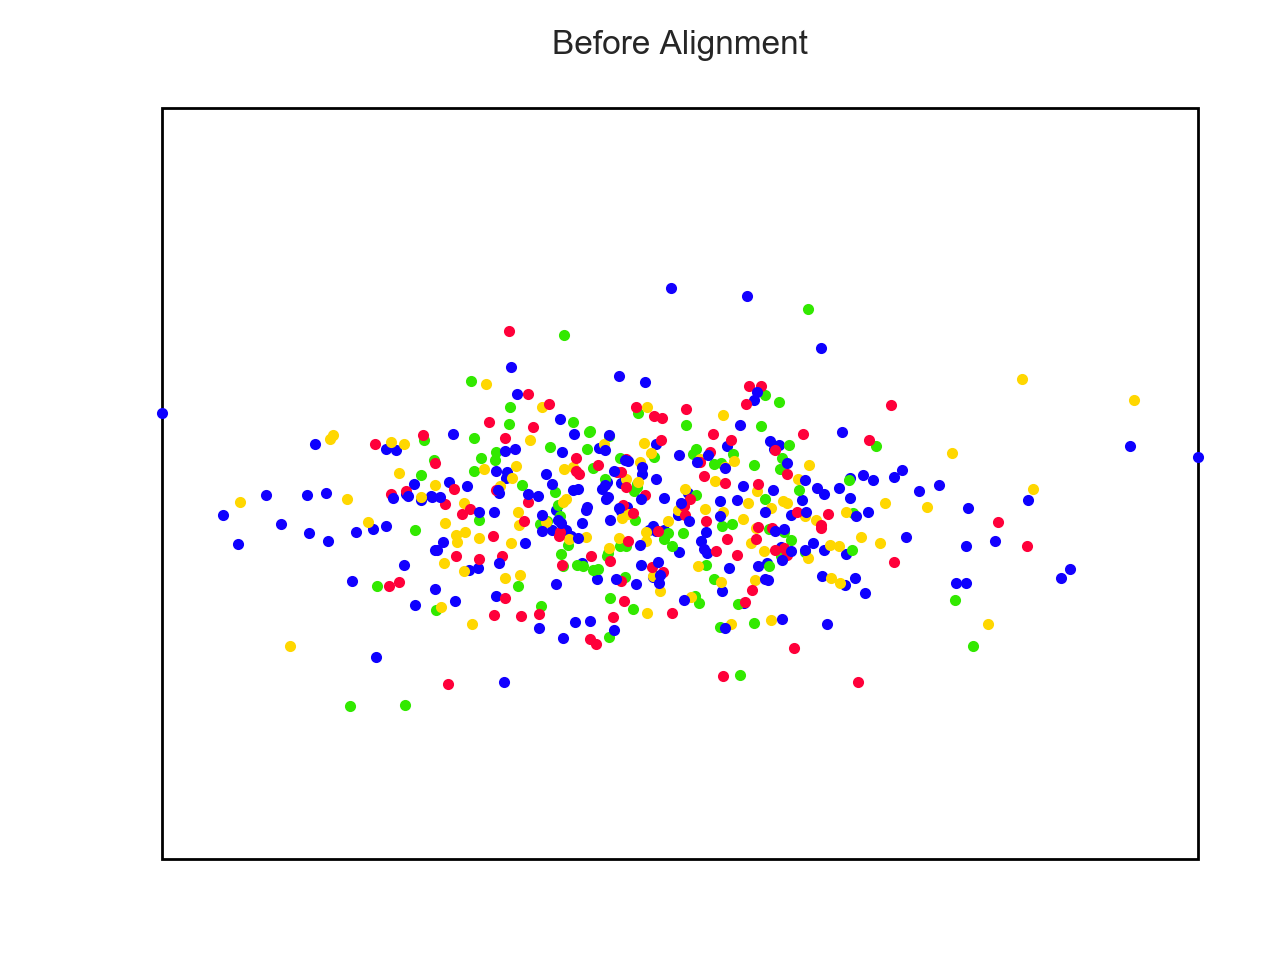

<IPython.core.display.Javascript object>


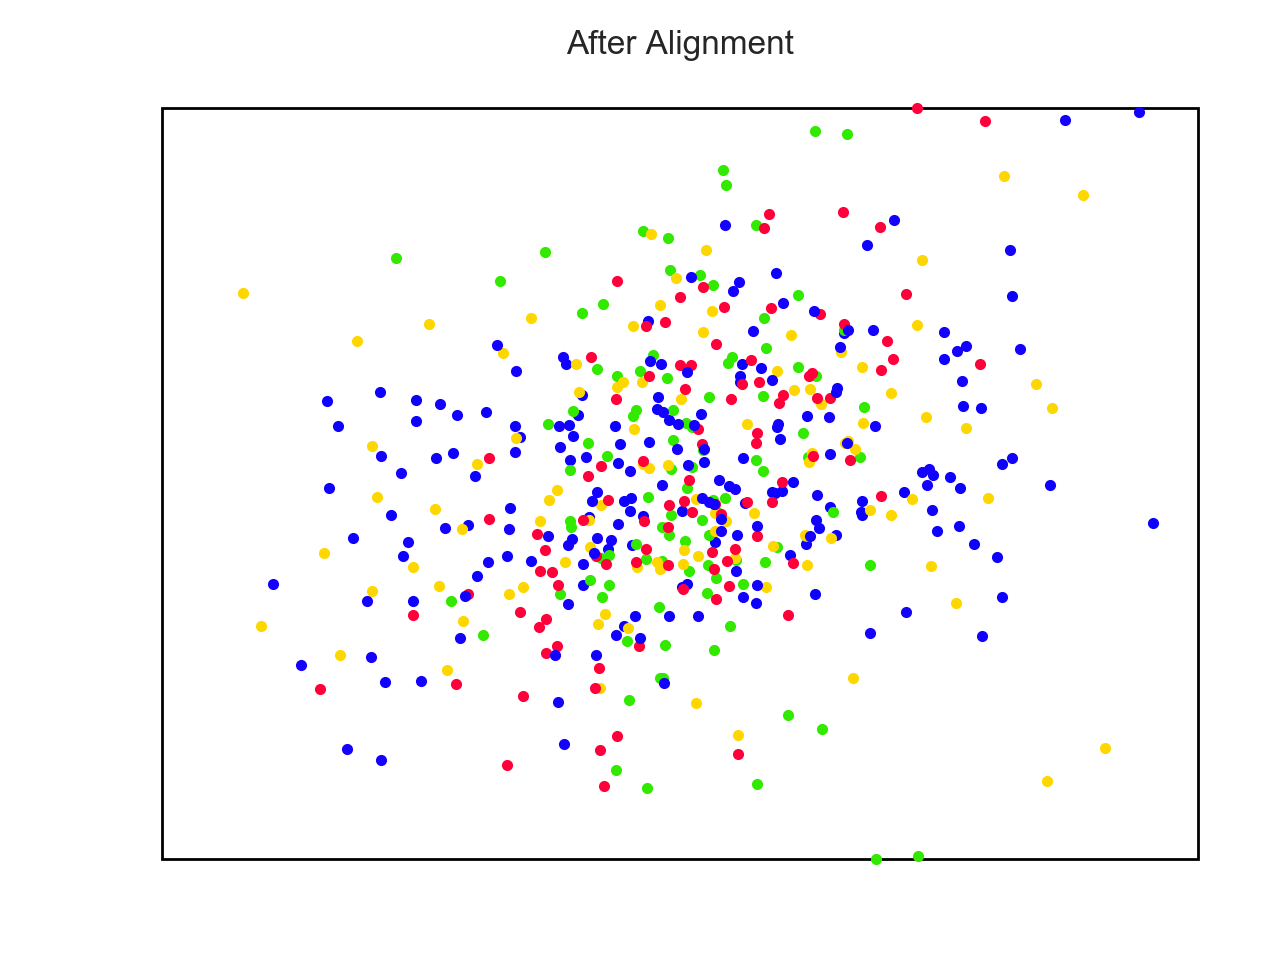

In [42]:
# Make 2D Plots
data_T_2D = list(np.array(dataset_T)[:, :, :2])
hyp.plot(data_T_2D, '.', palette='prism', title='Before Alignment')

hyp.plot(dataset_TA[2], '.', palette='prism', title='After Alignment')

<IPython.core.display.Javascript object>


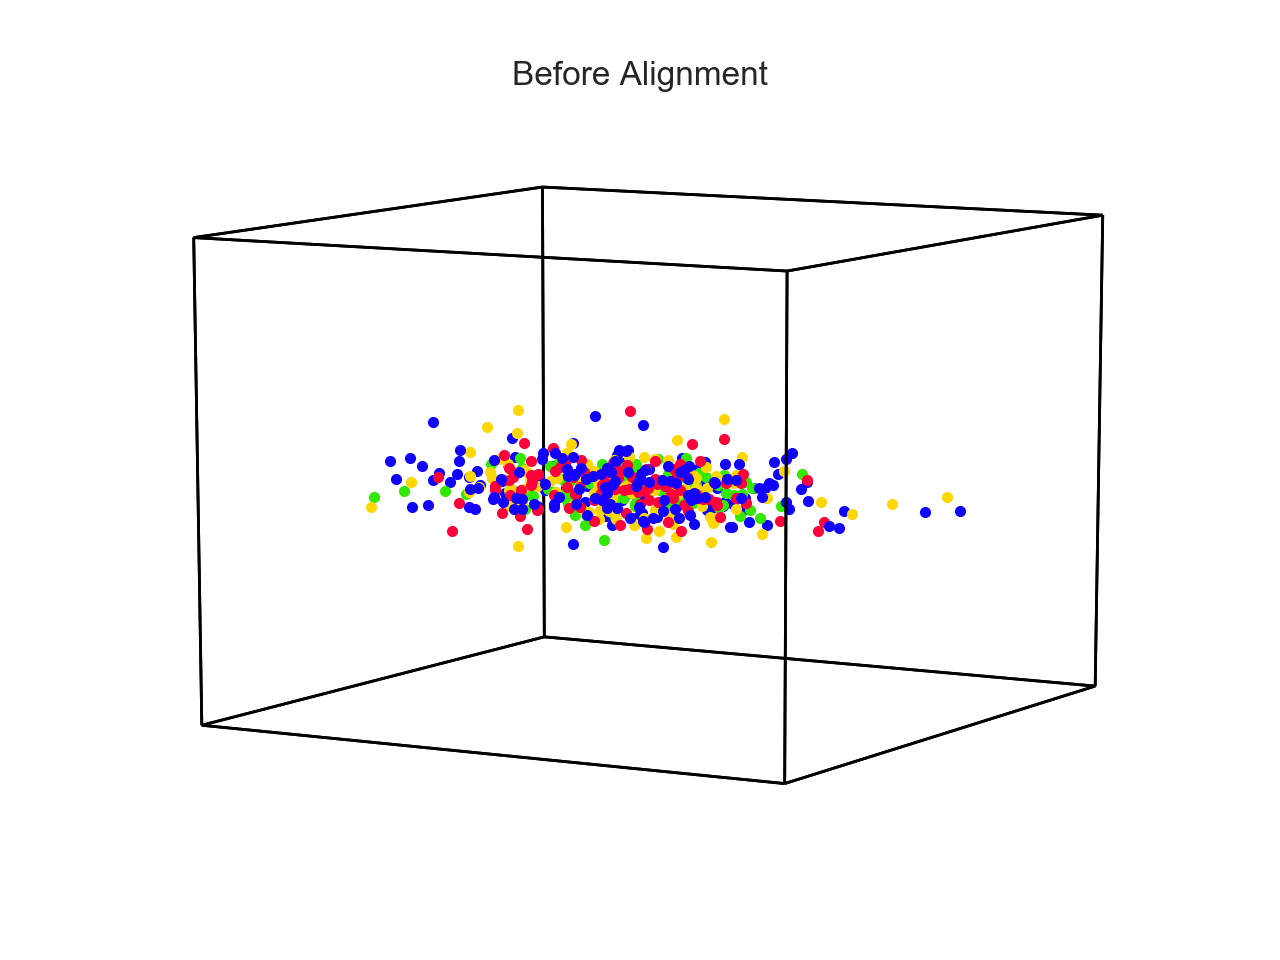

<IPython.core.display.Javascript object>


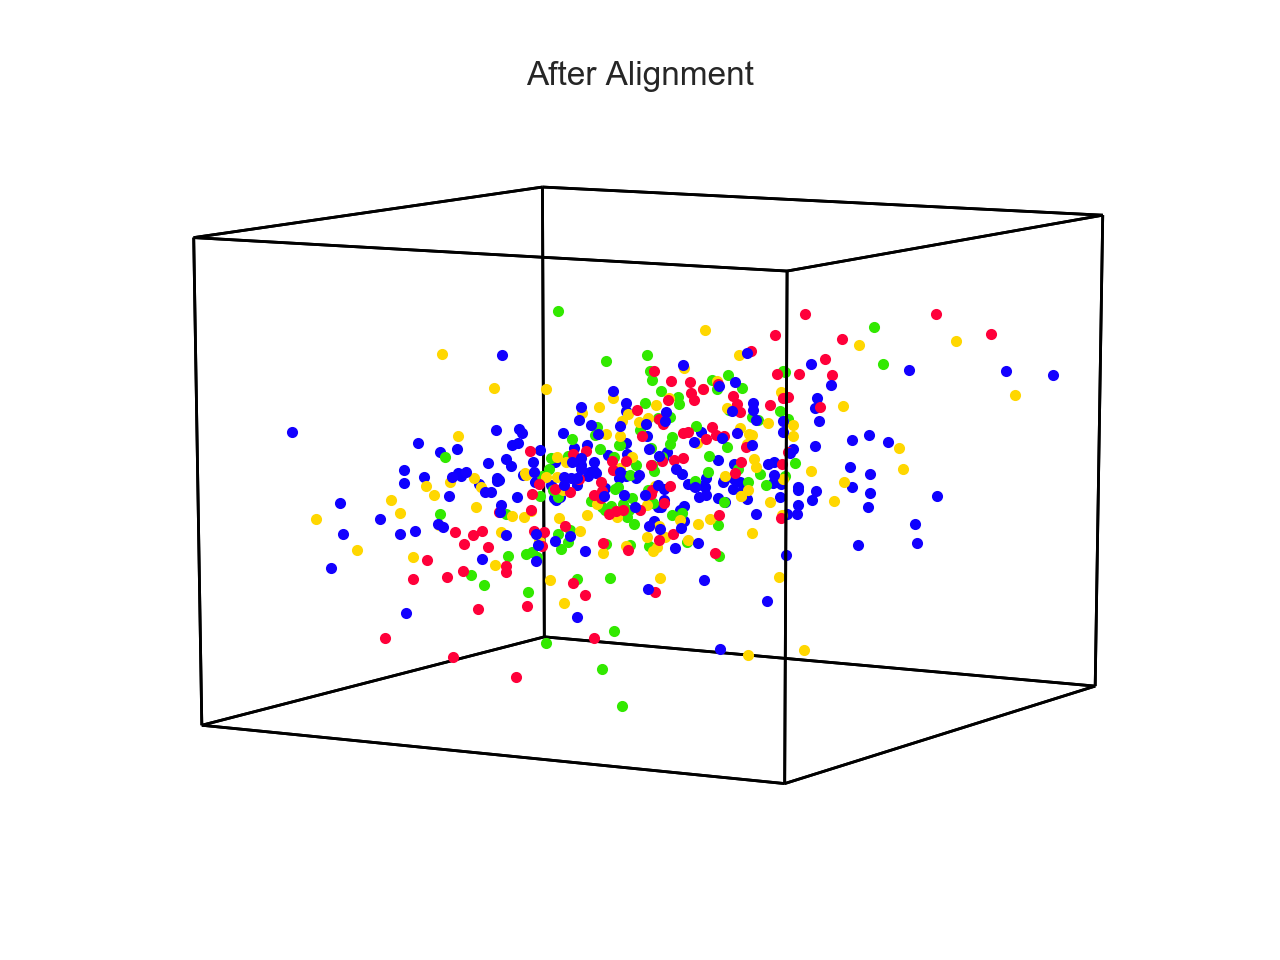

In [43]:
# Make 3D Plots
data_T_3D = list(np.array(dataset_T)[:, :, :3])
hyp.plot(data_T_3D, '.', palette='prism', title='Before Alignment')

hyp.plot(dataset_TA[3], '.', palette='prism', title='After Alignment')

### Alignment followed by PCA

In [44]:
# Perform hyperalignment ('A')
dataset_A = hyp.align(dataset)

In [45]:
# Concatenate data to perform single PCA across subjects
all_data_A = np.concatenate(dataset_A)

In [46]:
# Perform PCA transformation ('T')
pca = PCA(n_components=all_data_A.shape[1])
all_data_AT = pca.fit_transform(all_data_A)
var_ex = pca.explained_variance_ratio_
dataset_AT = np.split(all_data_AT, len(dataset))

<IPython.core.display.Javascript object>


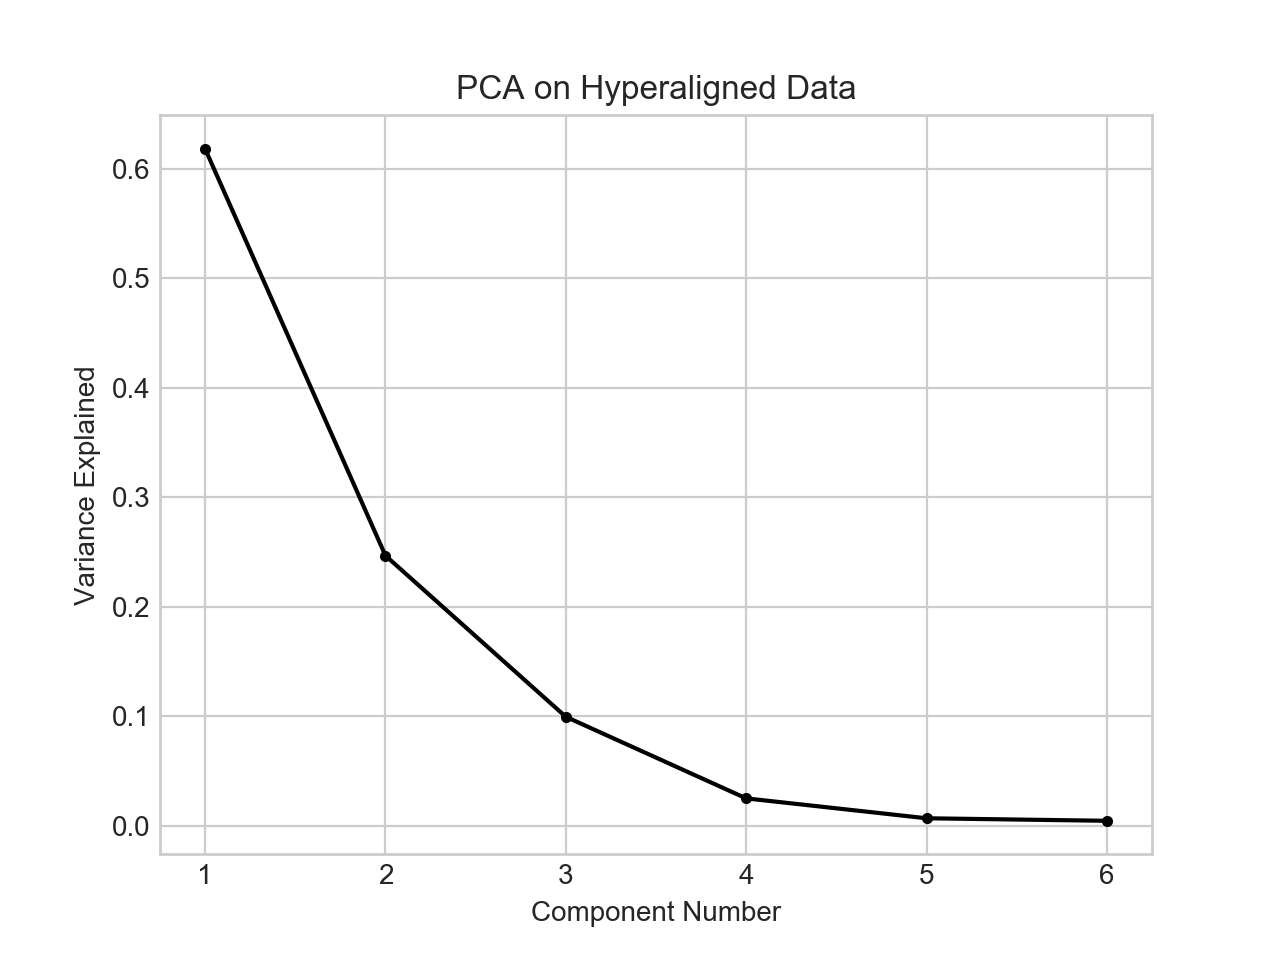

In [47]:
# Plot the variance explained by as a function of components
plt.plot(range(1,len(var_ex)+1), var_ex, 'k.-')
plt.ylabel('Variance Explained')
plt.xlabel('Component Number')
plt.title('PCA on Hyperaligned Data')
plt.show()

<IPython.core.display.Javascript object>


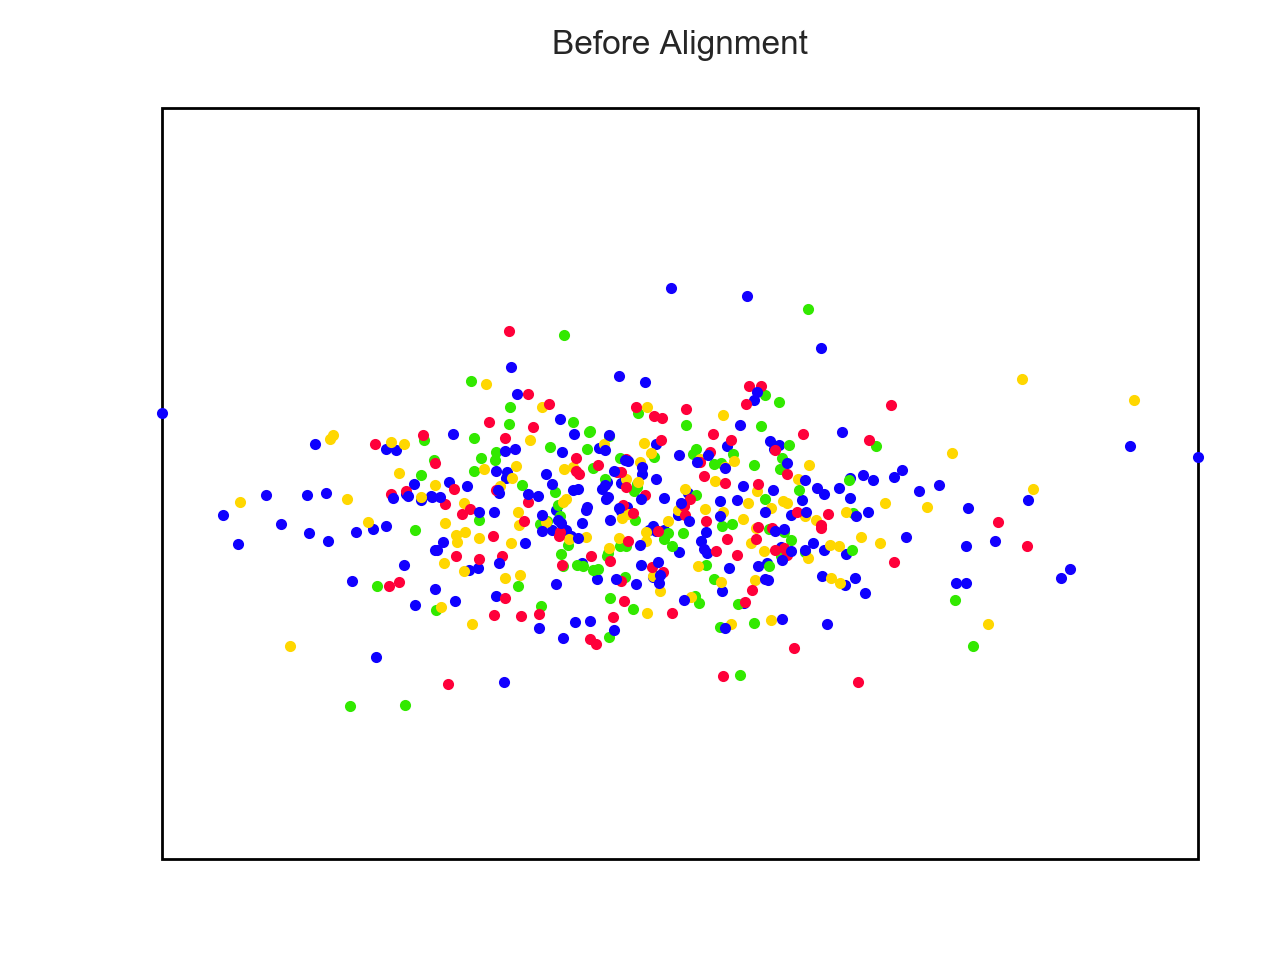

<IPython.core.display.Javascript object>


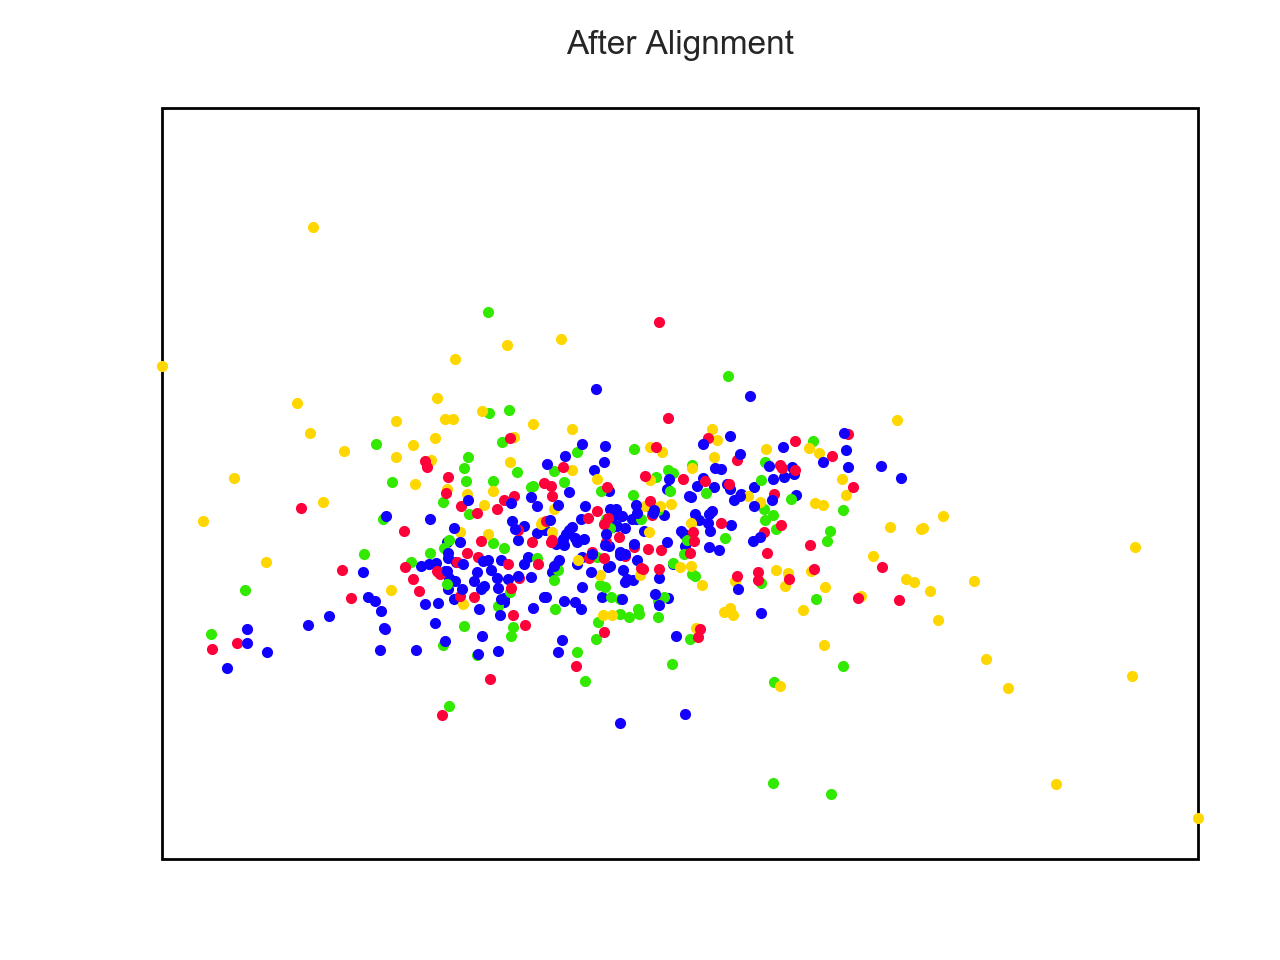

In [52]:
# Make 2D Plots
data_T_2D = list(np.array(dataset_T)[:, :, :2])
hyp.plot(data_T_2D, '.', palette='prism', title='Before Alignment')

data_AT_2D = list(np.array(dataset_AT)[:, :, :2])
hyp.plot(data_AT_2D, '.', palette='prism', title='After Alignment')

<IPython.core.display.Javascript object>


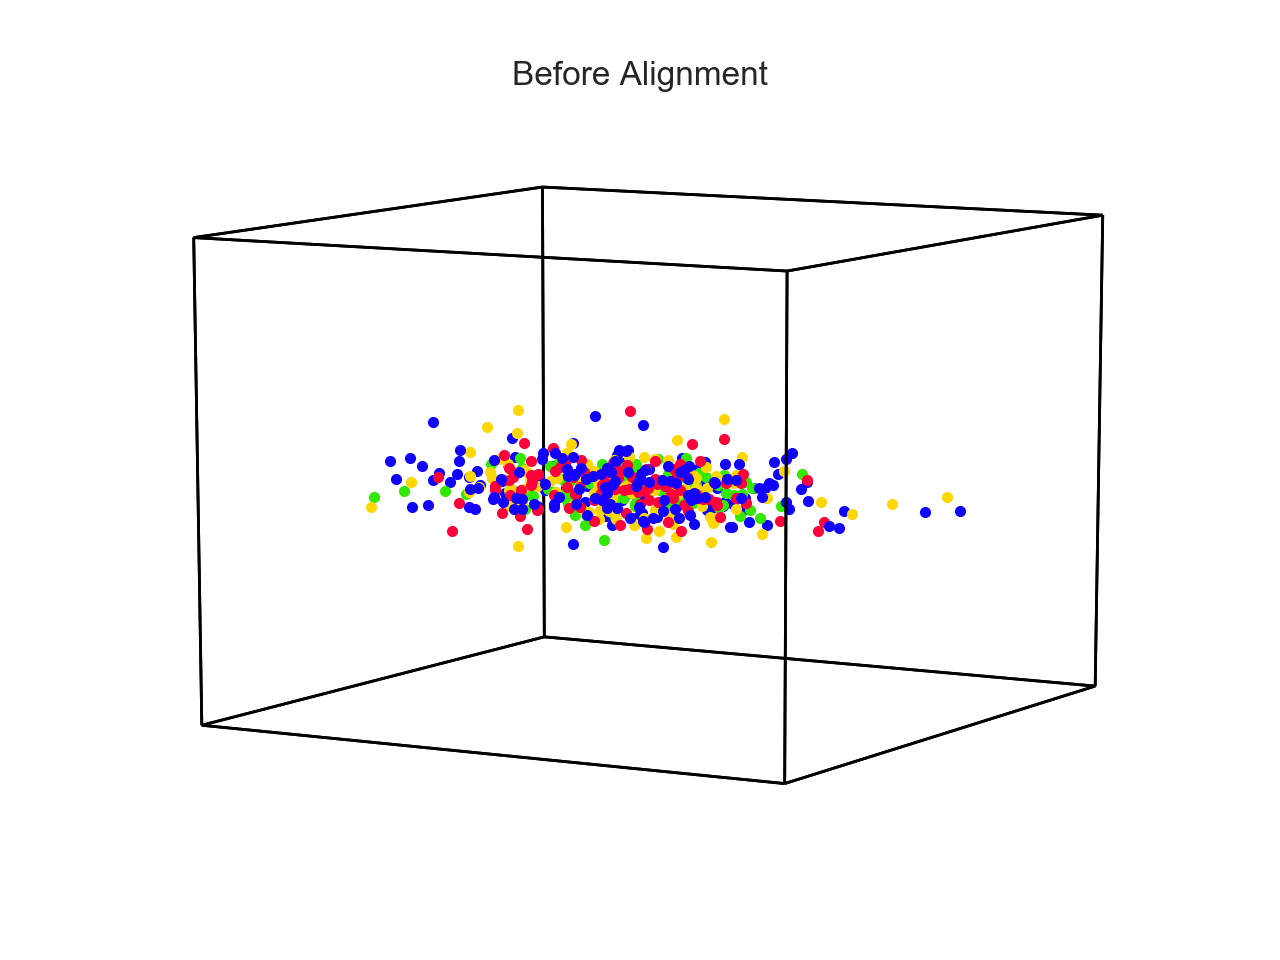

<IPython.core.display.Javascript object>


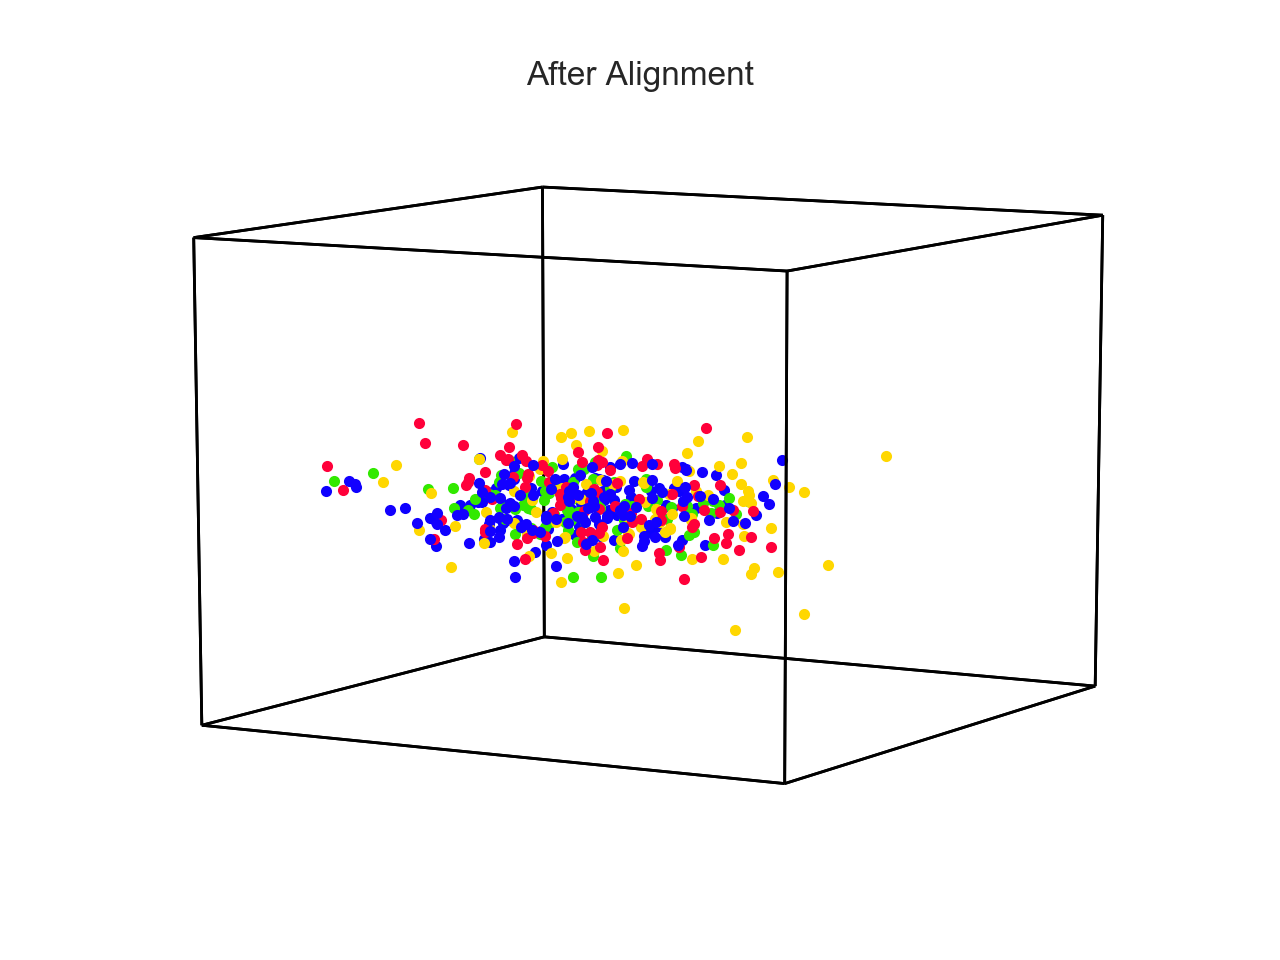

In [53]:
# Make 2D Plots
data_T_3D = list(np.array(dataset_T)[:, :, :3])
hyp.plot(data_T_3D, '.', palette='prism', title='Before Alignment')

data_AT_3D = list(np.array(dataset_AT)[:, :, :3])
hyp.plot(data_AT_3D, '.', palette='prism', title='After Alignment')

## Perform Classification on Lower Dimensional Data

In [ ]:
# Insert classification code here